In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('E:/data/time_series/start_stop/1.csv', index_col=0, parse_dates=True)

In [32]:
df = df.drop(['day_of_week'], axis=1)

In [33]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['hour'] = df.index.hour
df['week'] = df.index.week
df['day_of_week'] = df.index.dayofweek
df.head()

D:\anaconda3\envs\travel-time\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


,delta_t,year,month,day,hour,week,day_of_week
datetime,,,,,,,
2019-01-01 00:00:00,15034.000000,2019,1,1,0,1,1
2019-01-01 01:00:00,17934.000000,2019,1,1,1,1,1
2019-01-01 03:00:00,16488.666667,2019,1,1,3,1,1
2019-01-01 04:00:00,16258.000000,2019,1,1,4,1,1
2019-01-01 05:00:00,13732.600000,2019,1,1,5,1,1


## Visualizing time series data

In [34]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

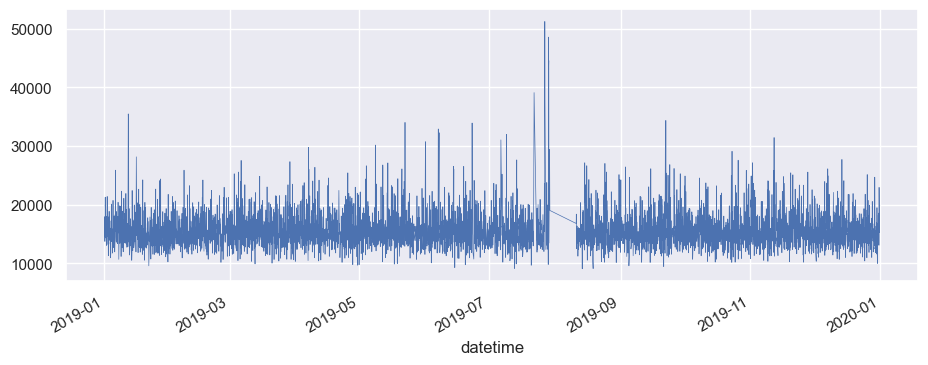

In [35]:
df['delta_t'].plot(linewidth=0.5)
plt.show()

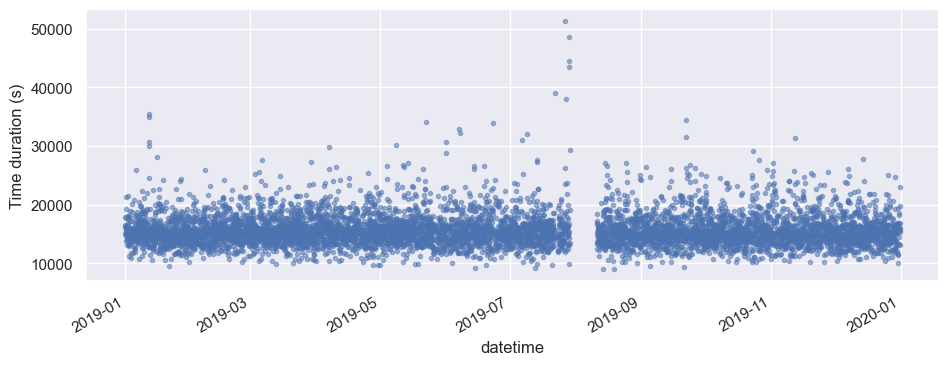

In [36]:
ax = df['delta_t'].plot(marker='.', alpha=0.5, linestyle='None')
ax.set_ylabel('Time duration (s)')
plt.show()

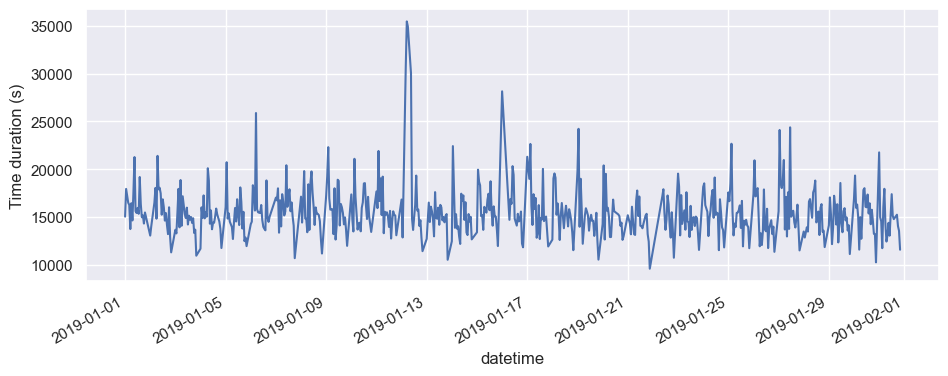

In [37]:
ax = df.loc['2019-01', 'delta_t'].plot()
ax.set_ylabel('Time duration (s)')
plt.show()

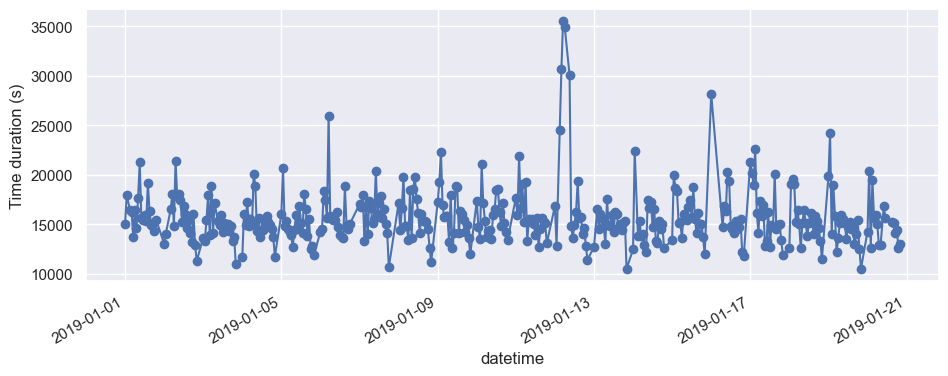

In [38]:
ax = df.loc['2019-01-01':'2019-01-20', 'delta_t'].plot(marker='o', linestyle='-')
ax.set_ylabel('Time duration (s)')
plt.show()

## Seasonality

### Month

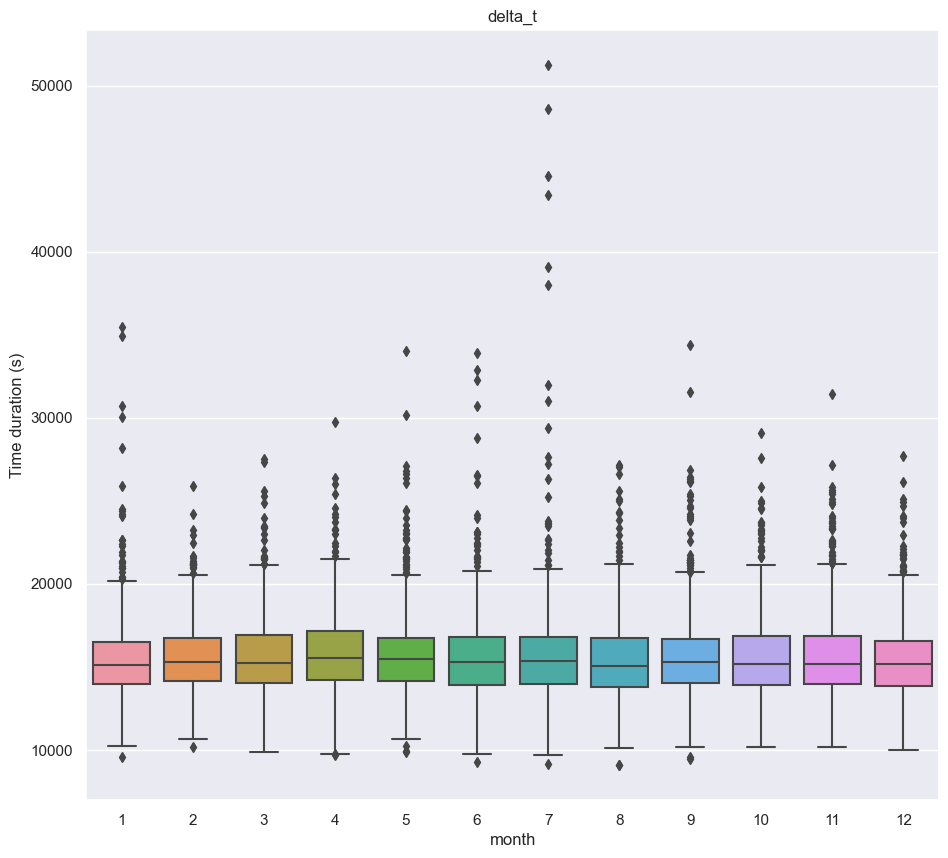

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=df, x='month', y='delta_t', ax=ax)
ax.set_ylabel('Time duration (s)')
ax.set_title('delta_t')
plt.show()

### Day of week

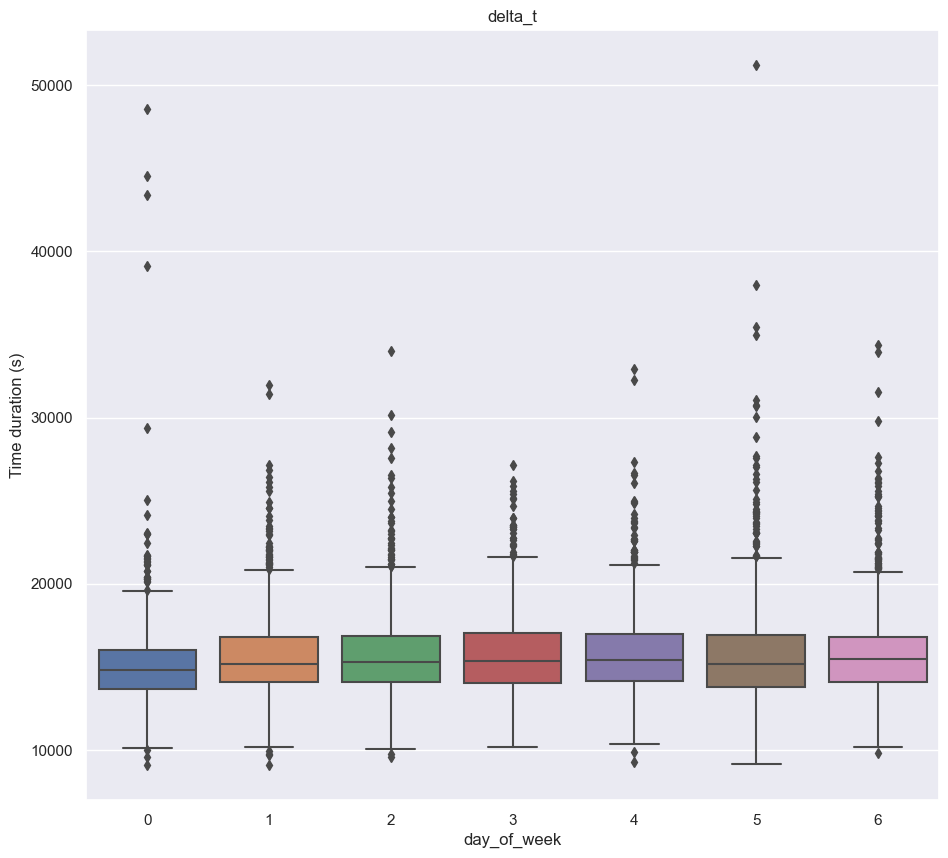

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=df, x='day_of_week', y='delta_t', ax=ax)
ax.set_ylabel('Time duration (s)')
ax.set_title('delta_t')
plt.show()

### Hour

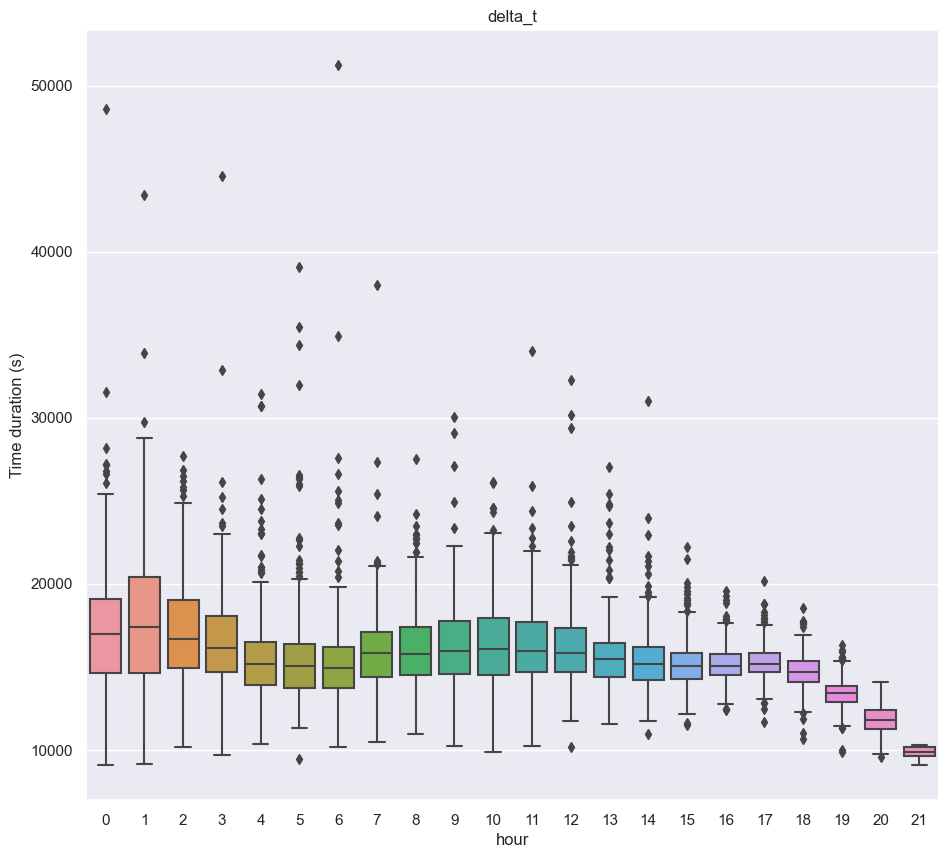

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=df, x='hour', y='delta_t', ax=ax)
ax.set_ylabel('Time duration (s)')
ax.set_title('delta_t')
plt.show()

## Resampling

In [42]:
df_weekly = df['delta_t'].resample('W').mean()
df_weekly.head()

datetime
2019-01-06    15437.565334
2019-01-13    16165.463847
2019-01-20    15503.614763
2019-01-27    15226.000206
2019-02-03    15190.558334
Freq: W-SUN, Name: delta_t, dtype: float64

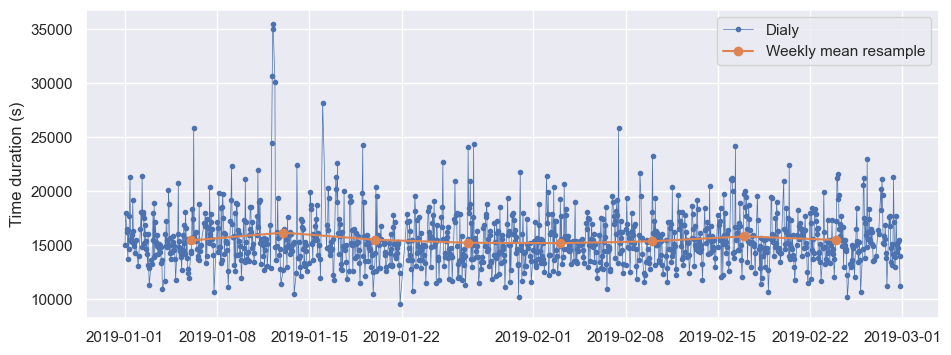

In [43]:
start, end = '2019-01', '2019-02'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'delta_t'], marker='.', linestyle='-', linewidth=0.5, label='Dialy')
ax.plot(df_weekly.loc[start:end], marker='o', linestyle='-', label='Weekly mean resample')
ax.set_ylabel('Time duration (s)')
ax.legend()
plt.show()

## Rolling windows

In [45]:
df_3h = df['delta_t'].rolling(3, center=True).mean()
df_3h.head()

datetime
2019-01-01 00:00:00             NaN
2019-01-01 01:00:00    16485.555556
2019-01-01 03:00:00    16893.555556
2019-01-01 04:00:00    15493.088889
2019-01-01 05:00:00    15476.866667
Name: delta_t, dtype: float64

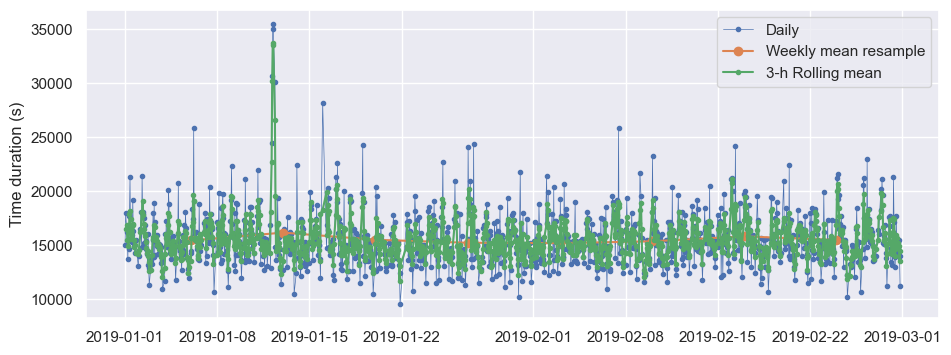

In [51]:
start, end = '2019-01', '2019-02'
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'delta_t'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_weekly.loc[start:end], marker='o', linestyle='-', label='Weekly mean resample')
ax.plot(df_3h.loc[start:end], marker='.', linestyle='-', label='3-h Rolling mean')
ax.set_ylabel('Time duration (s)')
ax.legend()
plt.show()

## fill data

In [53]:
df.resample('H').mean()

,delta_t,year,month,day,hour,week,day_of_week
datetime,,,,,,,
2019-01-01 00:00:00,15034.000000,2019.0,1.0,1.0,0.0,1.0,1.0
2019-01-01 01:00:00,17934.000000,2019.0,1.0,1.0,1.0,1.0,1.0
2019-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,16488.666667,2019.0,1.0,1.0,3.0,1.0,1.0
2019-01-01 04:00:00,16258.000000,2019.0,1.0,1.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...
2019-12-31 14:00:00,22946.000000,2019.0,12.0,31.0,14.0,1.0,1.0
2019-12-31 15:00:00,19838.000000,2019.0,12.0,31.0,15.0,1.0,1.0
2019-12-31 16:00:00,15715.250000,2019.0,12.0,31.0,16.0,1.0,1.0
